# ML_day2

In [204]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

### 데이터 특성 살펴보기

In [205]:
car = pd.read_csv("./data/CarPrice.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [206]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [207]:
car.drop('car_ID',axis=1, inplace=True)

In [208]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [209]:
car["drivewheel"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [210]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


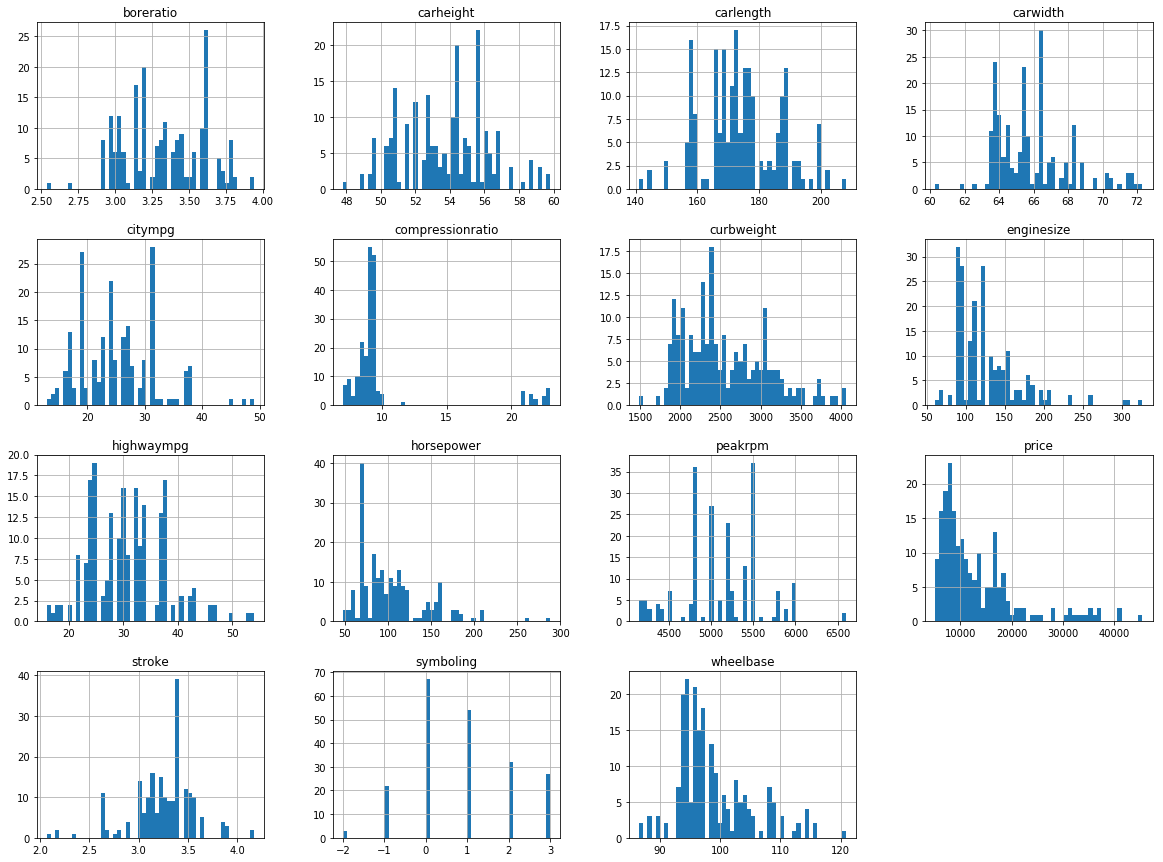

In [211]:
car.hist(bins=50, figsize=(20,15))
plt.show()

In [212]:
#categorical
car['symboling'] = car['symboling'].astype(str)

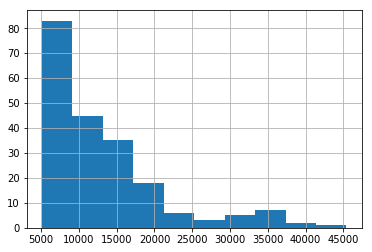

In [213]:
car["price"].hist()

In [214]:
corr_matrix = car.corr()

In [215]:
corr_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


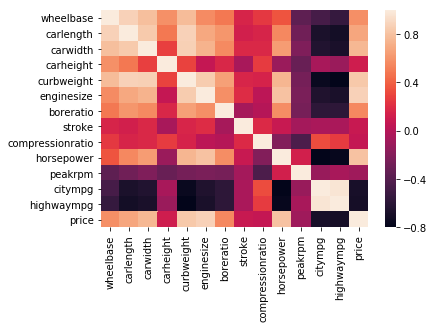

In [216]:
import seaborn as sns
sns.heatmap(corr_matrix)

## Missing value

In [217]:
car.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

결측값이 없으므로 결측치 대체 생략

In [218]:
car

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


### min-max scaler

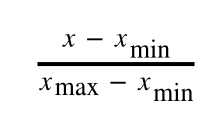

In [219]:
from sklearn.preprocessing import MinMaxScaler

category_columns = ['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
data = car[car.columns.difference(category_columns)]

# price가 제일 뒤로 배치
data = data[['boreratio','carheight','carlength','carwidth','citympg','compressionratio','curbweight','enginesize','highwaympg','horsepower','peakrpm','stroke','wheelbase','price']]

# 0과 1사이로 분포를 transform
scaler = MinMaxScaler()
scaler.fit(data)
scaler.transform(data)

array([[0.66428571, 0.08333333, 0.41343284, ..., 0.29047619, 0.05830904,
        0.20795889],
       [0.66428571, 0.08333333, 0.41343284, ..., 0.29047619, 0.05830904,
        0.28255797],
       [0.1       , 0.38333333, 0.44925373, ..., 0.66666667, 0.2303207 ,
        0.28255797],
       ...,
       [0.74285714, 0.64166667, 0.7119403 , ..., 0.38095238, 0.65597668,
        0.40631051],
       [0.33571429, 0.64166667, 0.7119403 , ..., 0.63333333, 0.65597668,
        0.43076312],
       [0.88571429, 0.64166667, 0.7119403 , ..., 0.51428571, 0.65597668,
        0.43461099]])

### StandardScaler

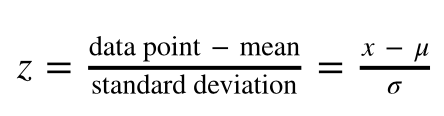

In [220]:
# 표준정규분포로 transform
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
scaler.transform(data)

array([[ 0.51907138, -2.0204173 , -0.42652147, ..., -1.83937734,
        -1.6907718 ,  0.02739114],
       [ 0.51907138, -2.0204173 , -0.42652147, ..., -1.83937734,
        -1.6907718 ,  0.4044611 ],
       [-2.40488029, -0.54352748, -0.23151305, ...,  0.68594616,
        -0.70859588,  0.4044611 ],
       ...,
       [ 0.9262039 ,  0.72823876,  1.19854871, ..., -1.23202105,
         1.72187336,  1.02998314],
       [-1.18348276,  0.72823876,  1.19854871, ...,  0.46218332,
         1.72187336,  1.15358178],
       [ 1.66644483,  0.72823876,  1.19854871, ..., -0.33696969,
         1.72187336,  1.17303131]])

### 훈련 세트에서 훈련하고 평가하기

In [221]:
data = scaler.transform(data)

In [222]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [223]:
X_train, y_train = train_set[:,0:-1], train_set[:,-1]
X_test, y_test = test_set[:,0:-1], test_set[:,-1]

In [224]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

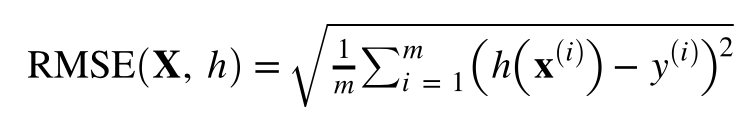

In [225]:
from sklearn.metrics import mean_squared_error

y_pred = tree_reg.predict(X_test)
y_true = y_test
rmse = np.sqrt(mean_squared_error(y_pred, y_true))
rmse

0.35406623223422345

## K-Fold Cross-Validation

In [226]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, cv=10)
scores

array([0.72526519, 0.87744743, 0.76566595, 0.90365069, 0.64496661,
       0.63845683, 0.8537246 , 0.85542825, 0.77771235, 0.85078399])

In [227]:
rmse_scores = np.sqrt(scores)
rmse_scores

array([0.85162503, 0.93672164, 0.8750234 , 0.95060543, 0.80309813,
       0.79903494, 0.92397219, 0.92489364, 0.88188001, 0.92237953])

In [228]:
print("평균:", rmse_scores.mean())
print("표준편차:", rmse_scores.std())

평균: 0.8869233927302392
표준편차: 0.05174053759670838


## 하이퍼 파라미터 튜닝

In [229]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [10, 100, 1000], 'max_features': [2, 4, 6, 8]},
  ]

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, return_train_score=True)

In [230]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [10, 100, 1000],
                          'max_features': [2, 4, 6, 8]}],
             return_train_score=True)

In [197]:
grid_search.best_params_

{'max_depth': 1000, 'max_features': 6}